In [98]:
import pandas as pd 
import tensorflow as tf 
from keras.layers import Input, Dense 
from keras.models import Model 
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt 
import seaborn as sns
from pyod.models.auto_encoder import AutoEncoder
from IPython.display import SVG
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# Импорт данных из CSV и предварительная обработка
df = pd.read_csv("data.csv", sep=',')
df.columns = ['Time, seconds', 'Series values, dB']
df['Time, seconds'] = df['Time, seconds'] * 10000
df['Time, seconds'] = pd.to_datetime(df['Time, seconds'], unit='s')
df.set_index('Time, seconds', inplace=True)
aggregated_df = df.resample('H').mean()

In [7]:
X_train = aggregated_df.values  # Ваши признаки для обучения
y_train = aggregated_df.index

In [9]:
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train

In [11]:
df_train.shape

(167, 2)

In [13]:
df_train.head()

,0,y
0,-6.653889,1970-01-01 00:00:00
1,2.231389,1970-01-01 01:00:00
2,-1.971389,1970-01-01 02:00:00
3,-2.823889,1970-01-01 03:00:00
4,-4.300556,1970-01-01 04:00:00


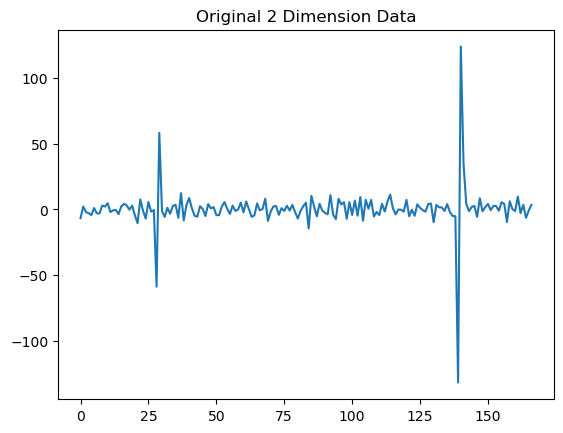

In [80]:
df_train.iloc[:, :-1].plot(legend=None, title='Original 2 Dimension Data');

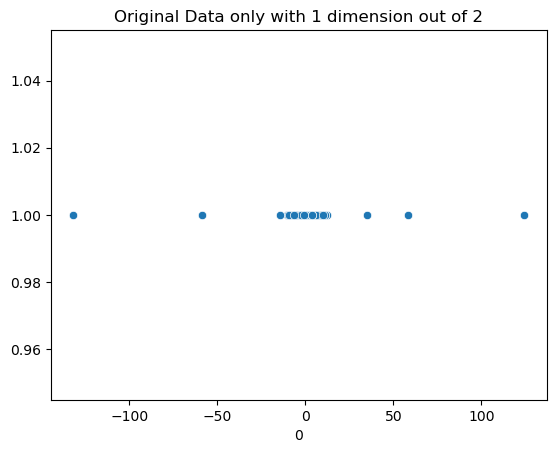

In [82]:
sns.scatterplot(x=0, y=1, data=df_train);
plt.title('Original Data only with 1 dimension out of 2');

In [104]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

In [106]:
history = model.fit(X_train, X_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
5/5 [==============================] - 1s 28ms/step - loss: 76.8807 - val_loss: 951.4913
Epoch 2/30
5/5 [==============================] - 0s 6ms/step - loss: 69.3010 - val_loss: 865.0767
Epoch 3/30
5/5 [==============================] - 0s 6ms/step - loss: 62.1483 - val_loss: 785.2198
Epoch 4/30
5/5 [==============================] - 0s 6ms/step - loss: 56.3594 - val_loss: 718.6442
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 52.3688 - val_loss: 650.9394
Epoch 6/30
5/5 [==============================] - 0s 7ms/step - loss: 46.8814 - val_loss: 589.6799
Epoch 7/30
5/5 [==============================] - 0s 13ms/step - loss: 42.9271 - val_loss: 529.1124
Epoch 8/30
5/5 [==============================] - 0s 9ms/step - loss: 37.5921 - val_loss: 478.9961
Epoch 9/30
5/5 [==============================] - 0s 9ms/step - loss: 34.4886 - val_loss: 433.0798
Epoch 10/30
5/5 [==============================] - 0s 7ms/step - loss: 30.9597 - val_loss: 393.4197
Epoch 1

In [108]:
y_train_pred = (clf.labels_ == 1).astype(int)
y_train_scores = clf.decision_scores_

In [110]:
y_train_pred[:5]

array([0, 0, 0, 0, 0])

In [69]:
y_train_scores[: 5]

array([0.82434965, 0.28117922, 0.53810136, 0.59021597, 0.68048683])

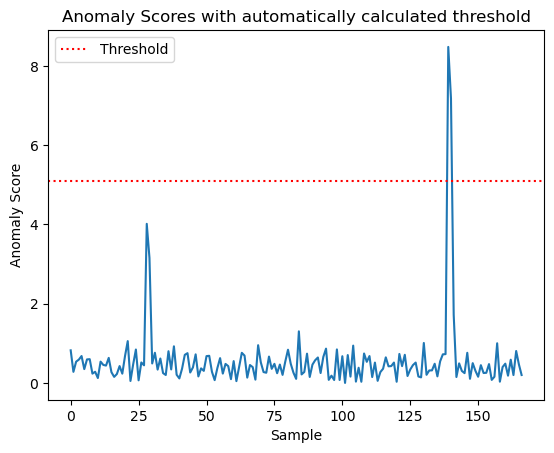

In [114]:
plt.plot(y_train_scores)
plt.axhline(y=clf.threshold_, c='r', ls='dotted', label='Threshold')
plt.title('Anomaly Scores with automatically calculated threshold')
plt.xlabel('Sample')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()

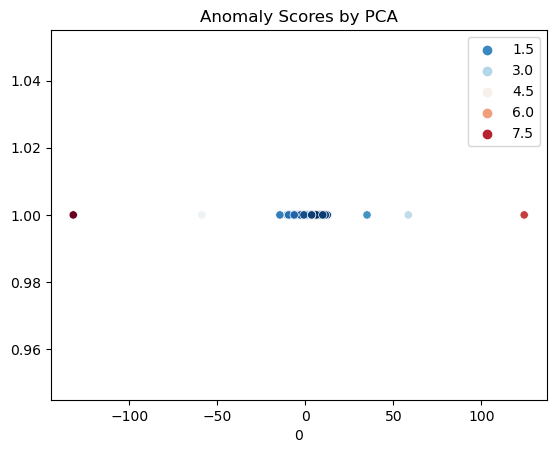

In [116]:
sns.scatterplot(x=0, y=1, hue=y_train_scores, data=df_train, palette='RdBu_r');
plt.title('Anomaly Scores by PCA');

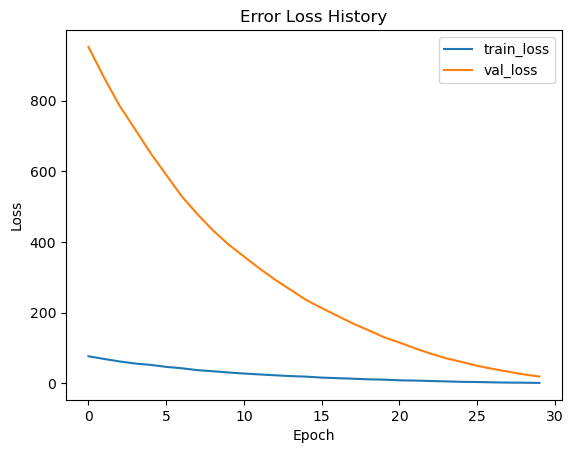

In [120]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Error Loss History')
plt.show()

In [40]:
from keras.utils import plot_model
SVG(plot_model(clf.model_, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

AttributeError: 'Image' object has no attribute 'create'